In [1]:
import glob
import pandas as pd
import numpy as np

import seaborn as sns
import pylab as pl

In [22]:
#files = glob.glob('models/sdBShortP_large_jdotp_*_alphaTH_0_ce_applied_reduced.csv')
#outname = 'models/combined_jdotp_alphaTH_0.csv'

#files = glob.glob('models/sdBShortP_large_jdotp_*_alphaTH_*.*_ce_applied_reduced.csv')
#outname = 'models/combined_jdotp_CE=TH.csv'

files = glob.glob('models/sdBShortP_large_mdot_*_alphaTH_0_ce_applied_reduced.csv')
outname = 'models/combined_mdot_alphaTH_0.csv'

#files = glob.glob('models/sdBShortP_large_mdot_*_alphaTH_*.*_ce_applied_reduced.csv')
#outname = 'models/combined_mdot_CE=TH.csv'

In [23]:
files

['models/sdBShortP_large_mdot_-3_alphaCE_0.10_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-3_alphaCE_0.15_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-2_alphaCE_0.20_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-3_alphaCE_0.30_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-2_alphaCE_0.30_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-1_alphaCE_1.00_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-1_alphaCE_0.50_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-1_alphaCE_0.20_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-1_alphaCE_0.30_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-3_alphaCE_1.00_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-2_alphaCE_0.70_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdot_-3_alphaCE_0.20_alphaTH_0_ce_applied_reduced.csv',
 'models/sdBShortP_large_mdo

In [24]:
usecols = ['stability', 'FeH_init', 'P_init',
           'P_final', 'M1_init', 'M1_final', 'M2_init', 'M2_final', 'q_init',
           'q_final', 'delta_max', 'logg_HeCoreBurning',
           'teff_HeCoreBurning', 'rad_HeCoreBurning', 'M1_HeCoreBurning',
           'M1core_HeCoreBurning', 'logg2_HeCoreBurning',
           'teff2_HeCoreBurning', 'rad2_HeCoreBurning',
           'log10_J_div_Jdot_div_P__min', 'Mdot_max', 'Jdot_max', 
           'stability_criterion', 'stability_limit',
           'ce_parameters', 'product', 'G_HeCoreBurning',
           'BP-RP_HeCoreBurning',
           'binary_type', 'observable_sd', 'RV_K1', 'RV_K2', 'reflection_amp']
dfs = []
for filename in files:
    df = pd.read_csv(filename, usecols=usecols)
    df['alpha_CE'] = df['ce_parameters'].apply(lambda x: eval(x)['a_ce'])
    df['alpha_TH'] = df['ce_parameters'].apply(lambda x: eval(x)['a_th'])
    
    df.drop(columns=['ce_parameters'], inplace=True)
    
    dfs.append(df)
    
data = pd.concat(dfs)

data.to_csv(outname)

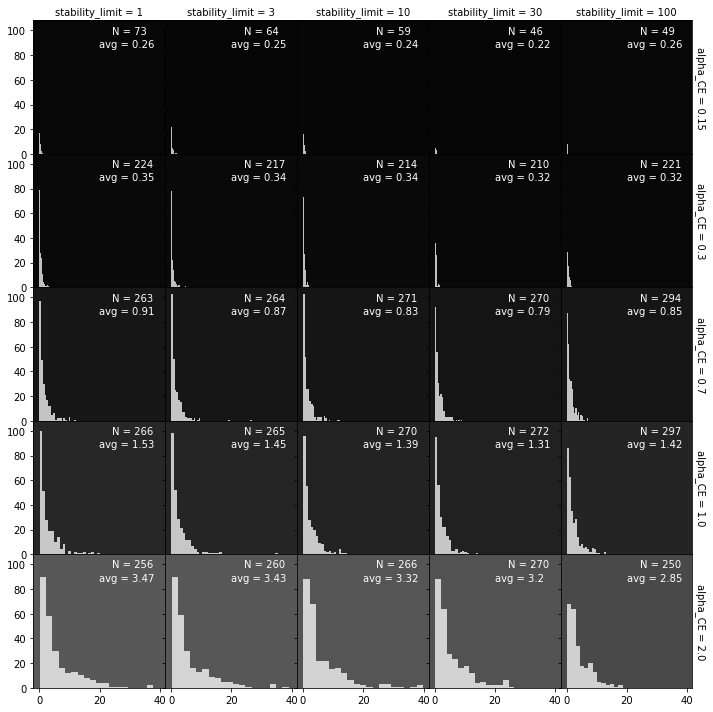